In [1]:
%load_ext autoreload
%autoreload 2
import utils.embeddings as em
from utils.metadata import fetch_metadata

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

In [4]:
data = fetch_metadata()

In [6]:
doc2vec_embeddings = em.load_embeddings("doc2vec")
stylistic_embeddings = em.load_embeddings("stylistic")

In [7]:
data

,id_nummer,forfatter,værk,tlg_genre,genre_first,genre_second,genre_second_notes,komplet_fragment,årstal,geografi,skal_fjernes,gender,length,Unnamed: 13
0,1219,Catenae (Novum Testamentum),Catena In Epistulam I Ad Timotheum,Catena,catena / kommentar,catena / kommentar,teologi,NaN,NaN,NaN,FALSE,M,66409.0,NaN
1,260,Achilles Tatius,Leucippe et Clitophon,Narratio Ficta,prosa,roman,NaN,K,125 AD,NaN,FALSE,M,196477.0,NaN
2,1336,Acta Barnabae,Περίοδοι καὶ μαρτύριον τοῦ ἁγίου Βαρνάβα τοῦ ἀ...,"Acta, Apocrypha, Hagiographa",prosa,fortælling,teologi,K,450 AD,NaN,FALSE,M,10712.0,NaN
3,1022,Acta Joannis,Acta Joannis,"Acta, Apocrypha",prosa,fortælling,teologi,K,150 AD,NaN,FALSE,M,61271.0,NaN
4,1227,Acta Joannis,Acta Joannis recenscio,NaN,prosa,fortælling,teologi,NaN,NaN,NaN,SAND,M,12344.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,840,Pseudo-Solomon,Wisdom of Solomon - WIS-ΣΟΦΙΑ ΣΑΛΩΜΩΜΟΣ,"Pseudepigrapha, Religiosa",NaN,NaN,NaN,K,50 BC,Alekandria,FALSK,M,36691.0,NaN
1931,808,Zechariah,Zechariah - ZEC-ΖΑΧΑΡΙΑΣ,"Propheteia, Religiosa",NaN,NaN,NaN,K,520-518 BC,Israel,FALSK,M,23834.0,NaN
1932,827,Zephaniah,Zephaniah - ZEP-ΣΟΦΟΝΙΑΣ,"Propheteia, Religiosa",NaN,NaN,NaN,K,600 BC,Israel,FALSK,M,5858.0,NaN
1933,44,"Athenaeus (dubblet, cf. entry no. 301)","The Deiphnosophists (dubblet, cf. entry no. 301)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAND,NaN,1320228.0,NaN


In [17]:
old_testament = data.id_nummer[data.forfatter == "Septuaginta"].unique()
markus_lukas_jonas = [
    783, #Markus
    789, #Lukas
    799, #Jonas
]

In [18]:
def map_category(s: pd.Series) -> str:
    if s.tlg_genre in {"Narratio Ficta", "Biographa", "Historica"}:
        return s.tlg_genre
    if s.id_nummer in old_testament:
        return "Gammel Testamente"
    if s.id_nummer in markus_lukas_jonas:
        return "Nye Testamente"
    return "Other"

In [20]:
data = data.assign(category = data.apply(map_category, axis=1))

In [23]:
disp_data = data[data.category != "Other"]

In [24]:
disp_data = em.add_embeddings(
    disp_data,
    semantic=doc2vec_embeddings,
    stylistic=stylistic_embeddings
)

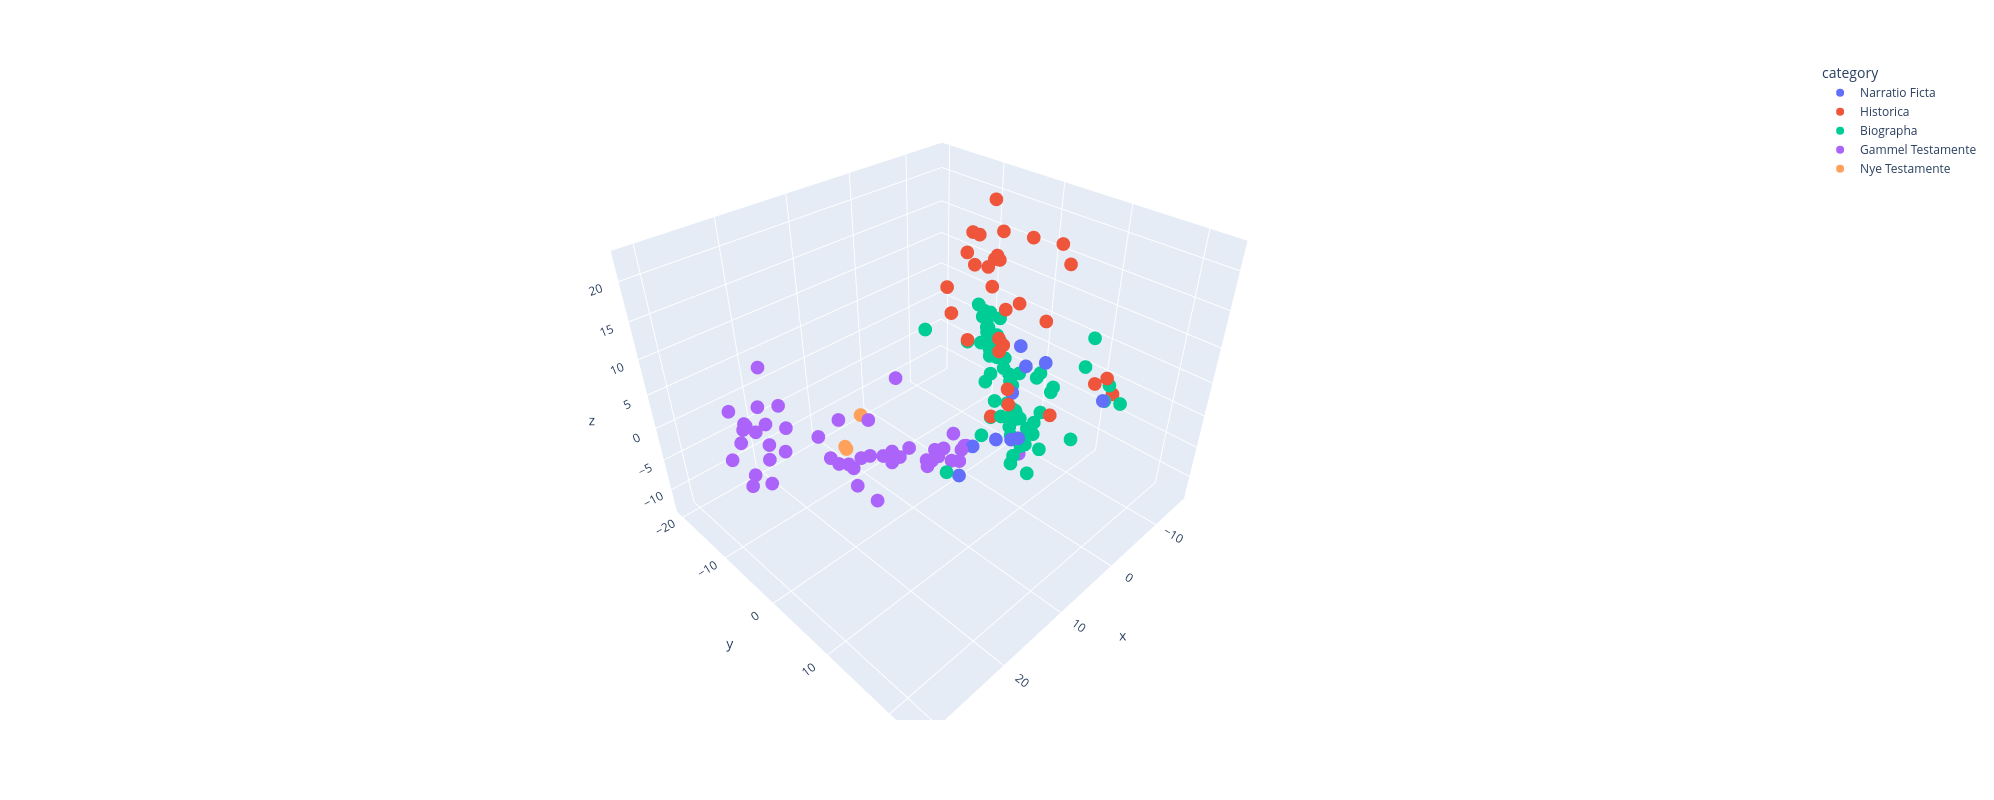

In [31]:
em.display_3d(
    disp_data,
    "semantic",
    color="category",
    hover_data={
        "værk": True,
        "forfatter": True,
        "category": False
    }
).update_layout(height = 800)

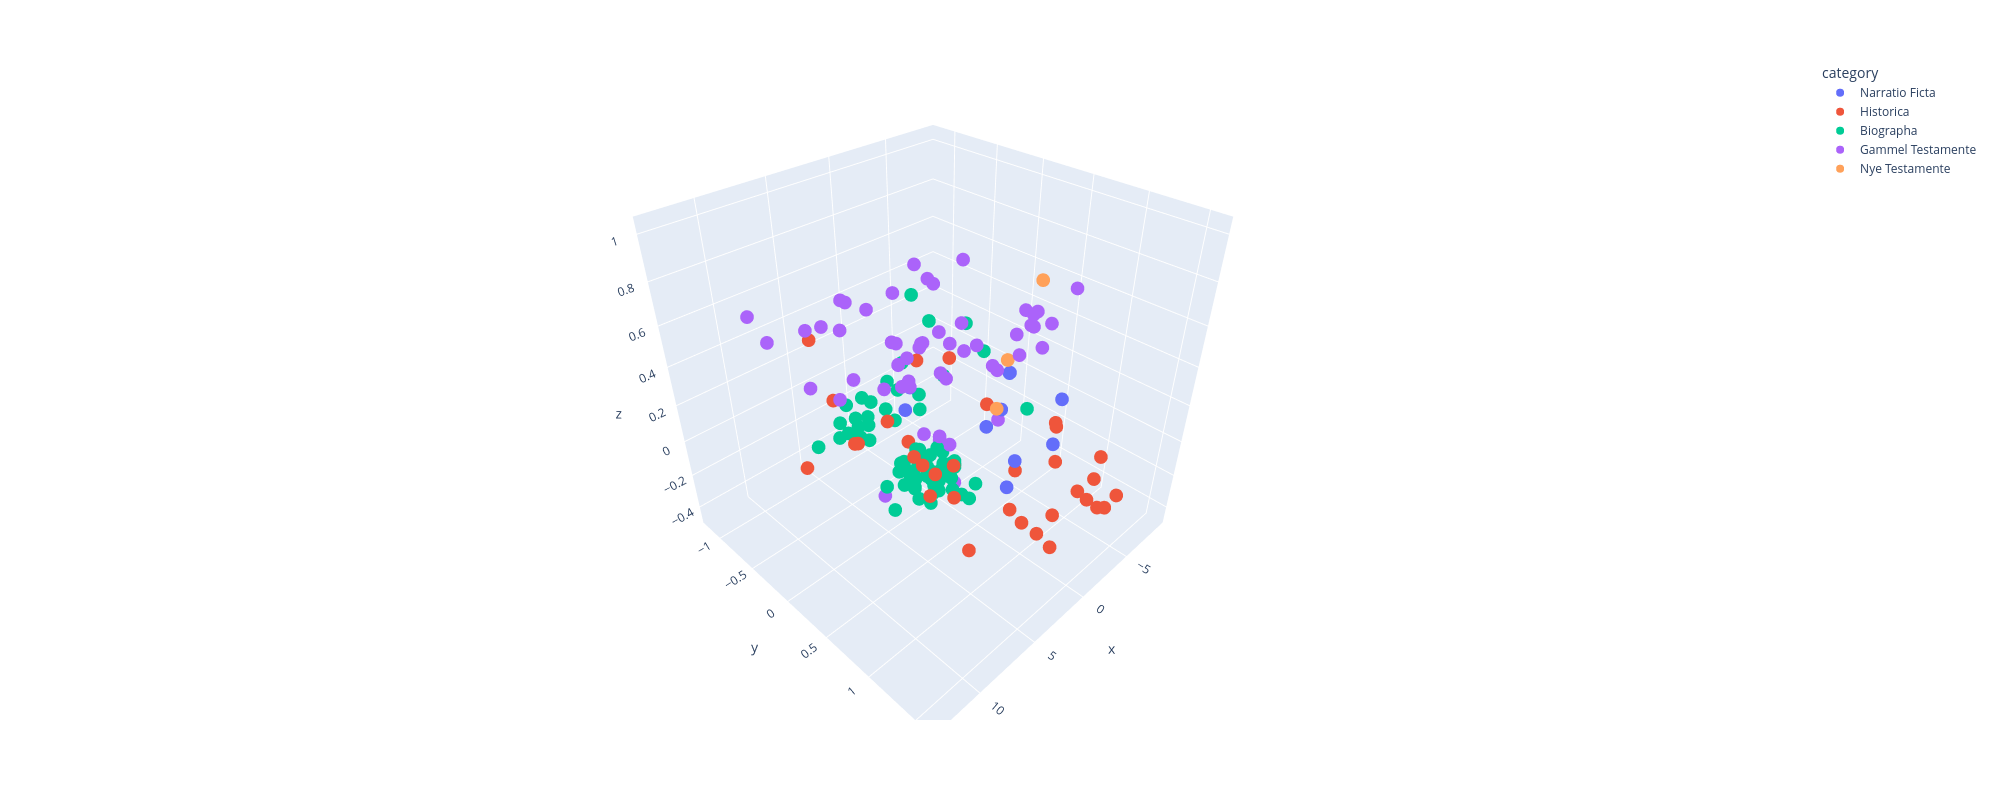

In [32]:
em.display_3d(
    disp_data,
    "stylistic",
    color="category",
    hover_data={
        "værk": True,
        "forfatter": True,
        "category": False
    }
).update_layout(height = 800)